In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from binarytree import tree,Node
import matplotlib
from pylab import *
import matplotlib.pyplot as plt
import copy

In [2]:
df=pd.read_csv("train.csv")

In [3]:
X=df.drop(['left'],axis=1)
Y=df['left']
X = pd.concat([X,pd.get_dummies(X['sales'], prefix='sales')],axis=1)
X = pd.concat([X,pd.get_dummies(X['salary'], prefix='salary')],axis=1)
X.drop(['sales','salary'],axis=1, inplace=True)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)
X_Original_train=copy.deepcopy(X_train)
X_train = pd.concat([X_train,Y_train],axis=1)
X_Original_test=copy.deepcopy(X_test)
eps = np.finfo(float).eps
# X_train

In [5]:
def find_overall_entropy(X_train):
    output=X_train.keys()[-1]
    target_value_list=X_train[output].unique()
    entropy=0
    for value in target_value_list:
        frac = float(X_train[output].value_counts()[value])/(len(X_train[output])+eps)
        entropy+=-frac*np.log2(frac+eps)
    return entropy

In [6]:
def find_attr_entropy(X_train,attr):
    if X_train.empty:
        return
    output=X_train.keys()[-1]
    target_value_list=X_train[output].unique()
    current_value_list=X_train[attr].unique()
    final_entropy=0
    den=1
    for cur_value in current_value_list:
        entropy=0
        for value in target_value_list:
            num = len(X_train[attr][X_train[attr] == cur_value][X_train[output] == value])
            den = len(X_train[attr][X_train[attr] == cur_value])
            frac=num/(den+eps)
            entropy+=-frac*np.log2(frac+eps)
        frac2=float(den)/len(X_train)
        final_entropy+=-frac2*entropy
    return final_entropy

In [7]:
def get_subdataframeNum1(X_train,node,value):
    if X_train.empty:
        return
    return X_train[X_train[node] < value].reset_index(drop=True)

In [8]:
def get_subdataframeNum2(X_train,node,value):
    if X_train.empty:
        return
    return X_train[X_train[node] >= value].reset_index(drop=True)

In [9]:
storemidpoint={}
storemidpoint.clear()
numeric_features = ['number_project','last_evaluation','satisfaction_level','average_montly_hours','time_spend_company']
for feature in numeric_features:
    IGMax=0
    midmax=0
    prev=None
    X_train.sort_values(feature,inplace=True)
    for index,row in X_train.iterrows():
        if prev is not None:
            if prev['left']!=row['left']:
                mid=(float(prev[feature])+float(row[feature]))/2
    #             print mid
                subtable1=get_subdataframeNum1(X_train,feature,mid)
                subtable2=get_subdataframeNum2(X_train,feature,mid)
                firstentropy=0
                secondentropy=0
                if subtable1.empty:
                    firstentropy=0
                else:
                    frac1=float(len(subtable1))/len(X_train)
                    firstentropy = frac1*find_overall_entropy(subtable1)
                if subtable2.empty:
                    secondentropy=0
                else:
                    frac2=float(len(subtable2))/len(X_train)
                    secondentropy = frac2*find_overall_entropy(subtable2)
                
                entropy1=find_overall_entropy(X_train)
                entropy2=firstentropy+secondentropy
                ig=abs(entropy1)-abs(entropy2)
    #             print ig
                if ig > IGMax:
                    IGMax=ig
                    midmax=mid

        prev=row
    storemidpoint[feature]=midmax
    for index,row in X_train.iterrows():
        if float(row[feature])>=midmax:
            X_train.at[index,feature]=1
        else:
            X_train.at[index,feature]=0
# print IGMax,midmax

In [10]:
print storemidpoint

{'satisfaction_level': 0.46499999999999997, 'last_evaluation': 0.58, 'average_montly_hours': 287.5, 'time_spend_company': 3.0, 'number_project': 2.5}


In [11]:
def get_subdataframe(X_train,node,value):
    return X_train[X_train[node] == value].reset_index(drop=True)

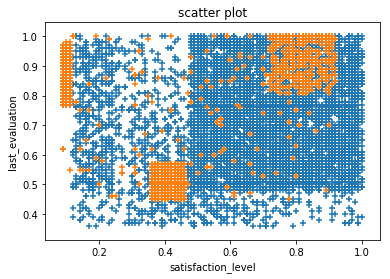

In [12]:
figure()
X_Original_train = pd.concat([X_Original_train,Y_train],axis=1)
X_train0 = X_Original_train[X_Original_train['left']==0]
X_train1 = X_Original_train[X_Original_train['left']==1]

scatter(X_train0['satisfaction_level'],X_train0['last_evaluation'],marker='+' )
scatter(X_train1['satisfaction_level'],X_train1['last_evaluation'],marker='+')

xlabel('satisfaction_level')
ylabel('last_evaluation')
title('scatter plot')

show()